In [27]:
import numpy as np
import pandas as pd
import tensorflow as tf
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt


Carregar a Base de dados

In [28]:
dataset = pd.read_csv('apple_quality.csv')

dataset

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good


Pre-processamento de dados

Remoção de linhas nulas
Separação dos dados em X (variáveis independentes) e y (variável dependente)
Transformação das variáveis categóricas em numéricas (LabelEncoder e OneHotEncoder) - aplicar no y
Separação em Teste e Treino
Normalização

In [29]:
# dataset[dataset.isnull().any(axis=1)] #mostra quantas linhas sao nulas

dataset = dataset.dropna() #remo as linhas que tem informações nulas
dataset = dataset.drop('A_id',axis=1)
dataset

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784369,bad
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good


In [30]:
x = dataset.drop('Quality',axis=1) #da primeira ate a penultima axis=1 == coluna
y = dataset.Quality #ultima

dataset.head()


,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [31]:
x.dtypes #mostro todas as colunas que interferem na minha classificação de boa ou ruim

Size           float64
Weight         float64
Sweetness      float64
Crunchiness    float64
Juiciness      float64
Ripeness       float64
Acidity         object
dtype: object

In [32]:
x['Acidity'] = x['Acidity'].astype(float)
x

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984
...,...,...,...,...,...,...,...
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720


In [33]:
y.replace({'good': 1, 'bad': 0}, inplace=True)
y

C:\Users\livia\AppData\Local\Temp\ipykernel_23292\2968644736.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y.replace({'good': 1, 'bad': 0}, inplace=True)


0       1
1       1
2       0
3       1
4       1
       ..
3995    0
3996    1
3997    0
3998    1
3999    1
Name: Quality, Length: 4000, dtype: int64

In [34]:
sns.pairplot(dataset,hue="Quality",height=1.5)

In [ ]:
from sklearn.model_selection import train_test_split #separando meu data set entre teste e treino
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1) #tamanho do meu teste

y_train

802     1
3870    0
3782    1
2612    1
463     1
       ..
1844    1
401     1
3632    0
527     0
120     0
Name: Quality, Length: 3600, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler #feito para normalizaçõa - colocar tudo na mesma escala numerica
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


Arquitetura da Rede Neural - MultiLayerPerceptron

In [ ]:
ann = tf.keras.models.Sequential() #sequencias de neuronios e nao recurssiva
#camada oculta
ann.add(tf.keras.layers.Dense(units=8, activation='relu')) #camada dense - todos estao conectados com o que esta na frente dele
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))
#faz a classificação - nesse caso binaria - good or bad
ann.add(tf.keras.layers.Dense(units=1, activation = 'sigmoid'))

#para classificação nao binaria usamos o category_crossentropy
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:

train = ann.fit(x_train,y_train,epochs=30,validation_split=0.1)


Epoch 1/30
  1/102 [..............................] - ETA: 0s - loss: 0.2119 - accuracy: 0.9062

102/102 [==============================] - 0s 3ms/step - loss: 0.2867 - accuracy: 0.8670 - val_loss: 0.2894 - val_accuracy: 0.8722
Epoch 2/30
102/102 [==============================] - 0s 2ms/step - loss: 0.2864 - accuracy: 0.8673 - val_loss: 0.2915 - val_accuracy: 0.8694
Epoch 3/30
102/102 [==============================] - 0s 2ms/step - loss: 0.2849 - accuracy: 0.8654 - val_loss: 0.2881 - val_accuracy: 0.8722
Epoch 4/30
102/102 [==============================] - 0s 3ms/step - loss: 0.2840 - accuracy: 0.8654 - val_loss: 0.2901 - val_accuracy: 0.8667
Epoch 5/30
102/102 [==============================] - 0s 2ms/step - loss: 0.2839 - accuracy: 0.8651 - val_loss: 0.2891 - val_accuracy: 0.8722
Epoch 6/30
102/102 [==============================] - 0s 3ms/step - loss: 0.2830 - accuracy: 0.8664 - val_loss: 0.2873 - val_accuracy: 0.8722
Epoch 7/30
102/102 [==============================] - 0s 3ms/step - loss: 0.2822 - accuracy: 0.8673 - val_loss: 0.2884 - val_accuracy: 0.8722
Epoch 8/30
102/10

Text(0, 0.5, 'loss')

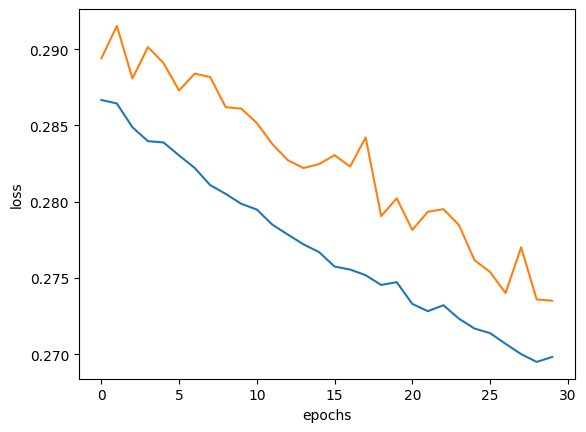

In [ ]:

sns.lineplot(data=train.history["loss"])
sns.lineplot(data=train.history["val_loss"])
plt.xlabel("epochs")
plt.ylabel("loss")

Text(0, 0.5, 'accuracy')

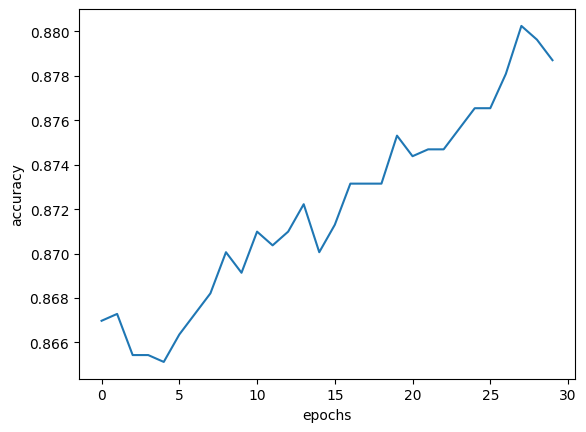

In [ ]:
sns.lineplot(data=train.history["accuracy"])
plt.xlabel("epochs")
plt.ylabel("accuracy")

In [ ]:
y_hat = ann.predict(x_test) #jogand o conjunto de teste no modelo treinado
# atribuir valor em que se for maior que 0,5 a probabilidade vai ser 1
y_hat = np.where(y_hat>0.5,1,0) #definindo meu th - se o item tiver probabilidade menor que 0,5 eu considero como ruim


13/13 [==============================] - 0s 2ms/step


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score


cm = confusion_matrix(y_test,y_hat) #comparar o resultado de fato com o predito

cm

array([[152,  33],
       [ 40, 175]], dtype=int64)

In [ ]:
accuracy_score(y_test,y_hat)

0.8175

<Axes: >

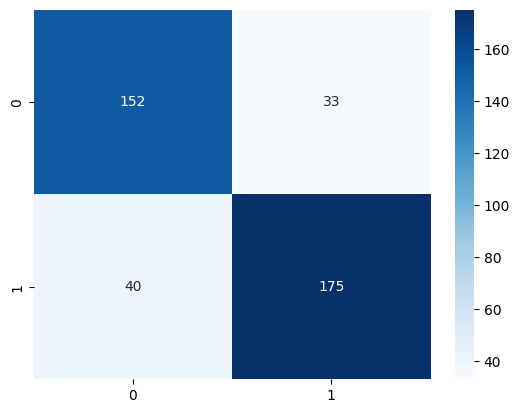

In [ ]:


sns.heatmap(confusion_matrix(y_test,y_hat),annot=True,cmap='Blues',fmt='g')
